In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df = pd.read_parquet('../data/series_train.parquet\id=0a418b57', engine='pyarrow')

In [3]:
df.head()

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT
0,0,-0.075242,-0.256743,-0.973791,0.038081,-72.952141,0.0,5.0,4202.000000,51250000000000,2,4,-9.0
1,1,-0.265893,-0.270508,-0.765470,0.077430,-52.849220,0.0,0.5,4185.333496,51255000000000,2,4,-9.0
2,2,0.334517,-0.548602,-0.588596,0.039162,-44.118084,0.0,11.5,4185.500000,51260000000000,2,4,-9.0
3,3,0.000193,-0.021069,-0.999681,0.001450,-88.759613,0.0,0.0,4185.666504,51265000000000,2,4,-9.0
4,4,-0.000685,-0.020681,-0.997677,0.000491,-88.756958,0.0,8.5,4185.833496,51270000000000,2,4,-9.0


In [4]:
df.describe()

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT
count,213423.000000,213423.000000,213423.000000,213423.000000,213423.000000,213423.000000,213423.0,213423.000000,213423.000000,2.134230e+05,213423.000000,213423.0,213423.000000
mean,106711.000000,0.195960,0.175270,-0.258108,0.056785,-17.940048,0.0,34.272129,3951.493408,5.354966e+13,3.992409,4.0,1.118324
std,61610.057588,0.539906,0.510206,0.453659,0.138671,31.710234,0.0,161.993332,110.120987,1.869022e+13,1.926265,0.0,6.136575
min,0.000000,-2.156349,-2.749820,-1.224756,0.000000,-89.846779,0.0,0.000000,3773.666748,0.000000e+00,1.000000,4.0,-9.000000
25%,53355.500000,-0.215934,-0.144534,-0.609729,0.006549,-39.841597,0.0,2.642857,3847.000000,4.026000e+13,2.000000,4.0,-4.000000
50%,106711.000000,0.304541,0.197180,-0.292209,0.018648,-18.342581,0.0,7.500000,3942.000000,5.448000e+13,4.000000,4.0,1.000000
75%,160066.500000,0.644210,0.586222,0.023711,0.052288,1.038353,0.0,16.416666,4035.000000,6.893000e+13,6.000000,4.0,6.000000
max,213422.000000,1.648549,3.055914,1.992976,4.674658,89.840576,0.0,2622.600098,4202.000000,8.639500e+13,7.000000,4.0,25.000000


In [5]:
# check if there are missing rows
df['time_of_day'].diff().value_counts()

time_of_day
 5.000000e+09    208078
 1.000000e+10       822
 1.500000e+10       580
 2.000000e+10       459
 2.500000e+10       306
                  ...  
 2.510000e+12         1
-8.551500e+13         1
 1.525000e+12         1
 9.050000e+11         1
-1.970000e+13         1
Name: count, Length: 370, dtype: int64

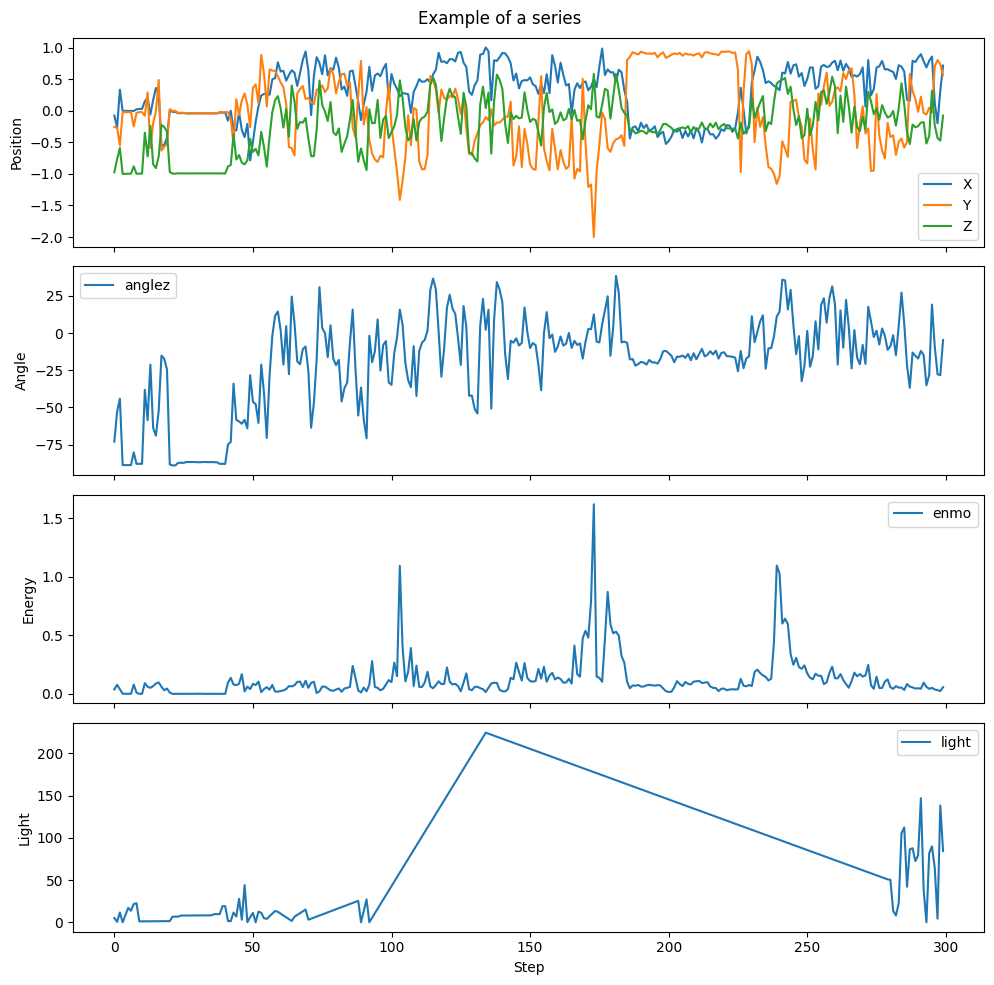

In [25]:
fig, ax = plt.subplots(4, figsize=(10, 10), sharex=True)
ax[0].plot(df['step'][:300], df['X'][:300], label='X')
ax[0].plot(df['step'][:300], df['Y'][:300], label='Y')
ax[0].plot(df['step'][:300], df['Z'][:300], label='Z')
ax[0].set_ylabel('Position')
ax[0].legend()

ax[1].plot(df['step'][:300], df['anglez'][:300], label='anglez')
ax[1].set_ylabel('Angle')
ax[1].legend()

ax[2].plot(df['step'][:300], df['enmo'][:300], label='enmo')
ax[2].set_ylabel('Energy')
ax[2].legend()

ax[3].plot(df['step'][:300], df['light'][:300], label='light')
ax[3].set_ylabel('Light')
ax[3].legend()

plt.xlabel('Step')
fig.suptitle('Example of a series')
fig.tight_layout()

Text(0.5, 1.0, 'Mean energy by hour and weekday')

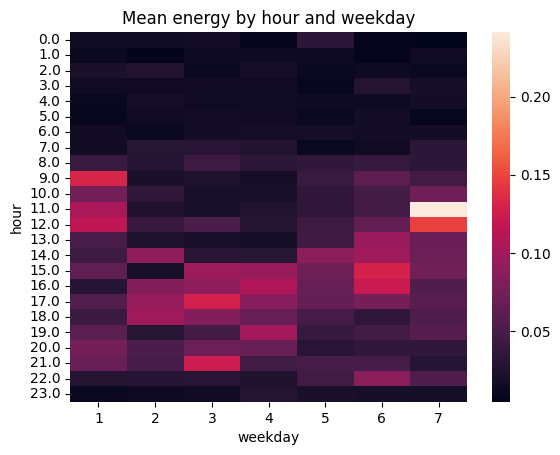

In [12]:
df['hour'] = df['time_of_day'] // (3600 * 1e9)
agg_data = df.pivot_table(index='hour', columns='weekday',
                          values='enmo', aggfunc='mean')
sns.heatmap(agg_data)
plt.title('Mean energy by hour and weekday')

Text(0.5, 1.0, 'Mean light by hour and weekday')

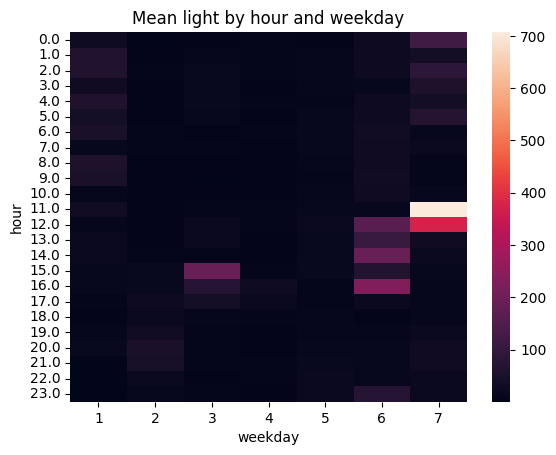

In [26]:
df['hour'] = df['time_of_day'] // (3600 * 1e9)
agg_data = df.pivot_table(index='hour', columns='weekday',
                          values='light', aggfunc='mean')
sns.heatmap(agg_data)
plt.title('Mean light by hour and weekday')

Lux Level | Light Condition
--- | ---
1 | Twilight
5 | Minimal Street Lighting
10 | Sunset
50 | Family Living Room
80 | Hallway 
100 | Very Dark Overcast Day 
320 - 500 | Office Lighting 
400 | Sunrise/Sunset 
1,000 | Overcast Day 
10,000-25,000 | Full Daylight 
32,000-130,000 |Direct Sunlight

array([[<Axes: title={'center': 'step'}>, <Axes: title={'center': 'X'}>,
        <Axes: title={'center': 'Y'}>, <Axes: title={'center': 'Z'}>],
       [<Axes: title={'center': 'enmo'}>,
        <Axes: title={'center': 'anglez'}>,
        <Axes: title={'center': 'non-wear_flag'}>,
        <Axes: title={'center': 'light'}>],
       [<Axes: title={'center': 'battery_voltage'}>,
        <Axes: title={'center': 'time_of_day'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'quarter'}>],
       [<Axes: title={'center': 'relative_date_PCIAT'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

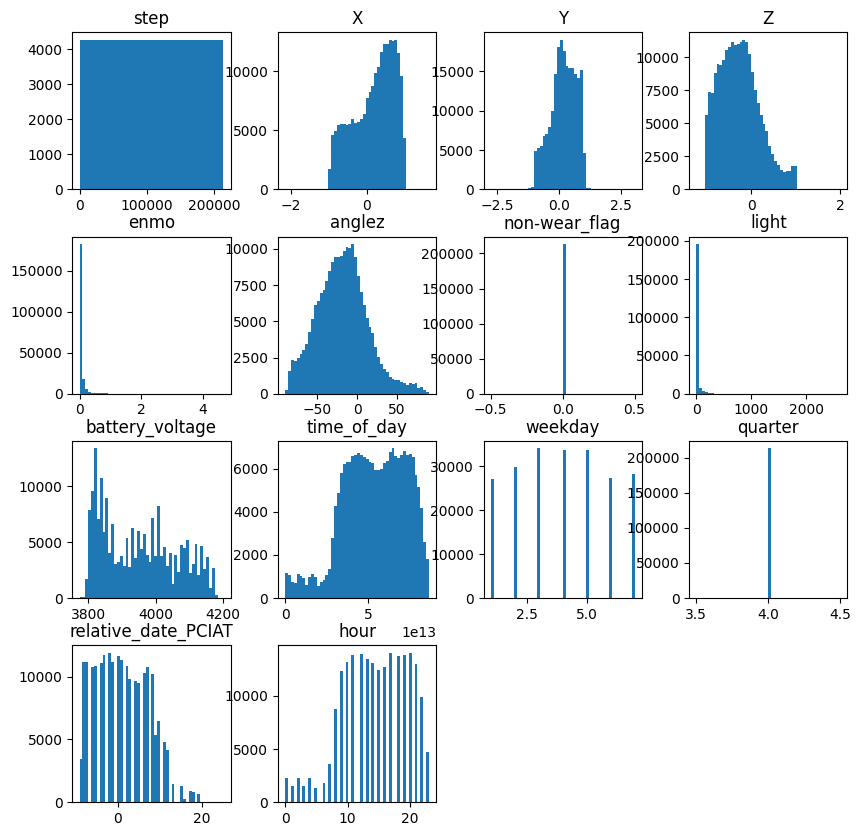

In [29]:
df.hist(bins=50, figsize=(10, 10), grid=False)

Text(0, 0.5, 'Energy')

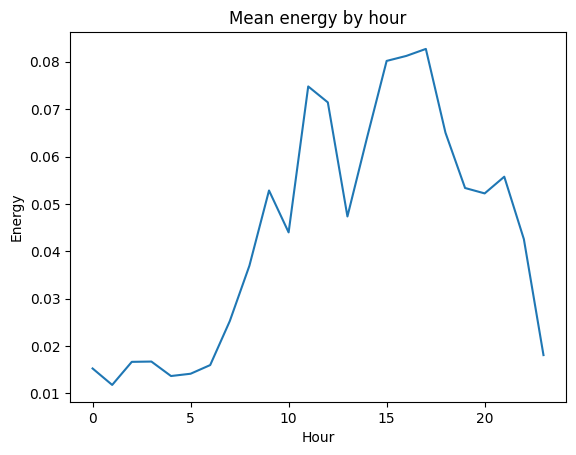

In [30]:
agg_data = df.pivot_table(index='hour', values='enmo', aggfunc='mean')
plt.plot(agg_data)
plt.title('Mean energy by hour')
plt.xlabel('Hour')
plt.ylabel('Energy')

Text(0, 0.5, 'Energy')

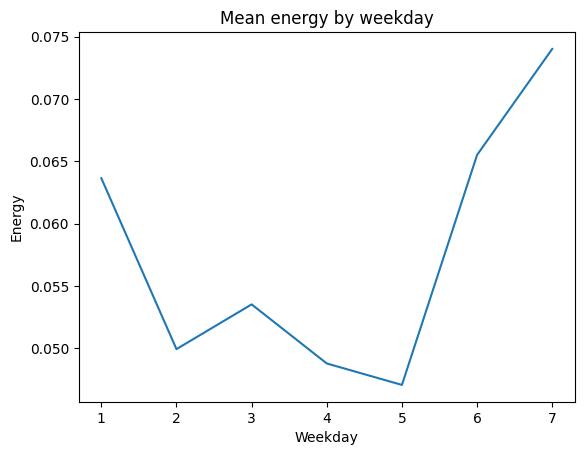

In [31]:
agg_data = df.pivot_table(index='weekday', values='enmo', aggfunc='mean')
plt.plot(agg_data)
plt.title('Mean energy by weekday')
plt.xlabel('Weekday')
plt.ylabel('Energy')

In [ ]:
df_tabular = pd.read_csv('../data/train.csv')

In [6]:
print('Number of rows:', len(df_tabular))
print('Number of missing target values:', df_tabular['sii'].isna().sum())

Number of rows: 3960
Number of missing target values: 1224


In [12]:
df_tabular['sii'].value_counts()

0.0    1594
1.0     730
2.0     378
3.0      34
Name: sii, dtype: int64

In [ ]:
df_new = pd.DataFrame(columns=['id', 'enmo', 'light'])

for id in df_tabular['id'].values:
    # first check if the file exists
    if not os.path.exists(f'../data/series_train.parquet\id={id}'):
        continue
    df_id = pd.read_parquet(f'../data/series_train.parquet\id={id}', engine='pyarrow')
    enmo = df_id['enmo'].mean()
    light = df_id['light'].mean()
    df_new = df_new.append({'id': id, 'enmo': enmo, 'light': light},
                           ignore_index=True)

Text(0.5, 0.98, 'Histogram of enmo and light for all the participants')

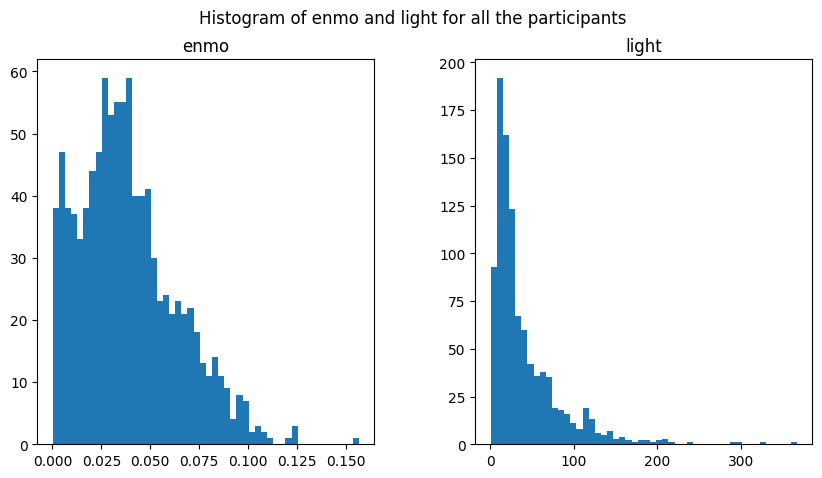

In [11]:
df_new.hist(bins=50, figsize=(10, 5), grid=False)
plt.suptitle('Histogram of enmo and light for all the participants')

In [12]:
print(f'Min enmo: {df_new["enmo"].min()}')
print(f'Max enmo: {df_new["enmo"].max()}')
print(f'Min light: {df_new["light"].min()}')
print(f'Max light: {df_new["light"].max()}')

Min enmo: 0.00010647414455888793
Max enmo: 0.1568301022052765
Min light: 0.3143816590309143
Max light: 367.2262268066406


Text(0.5, 0.98, 'Energy and light by ID')

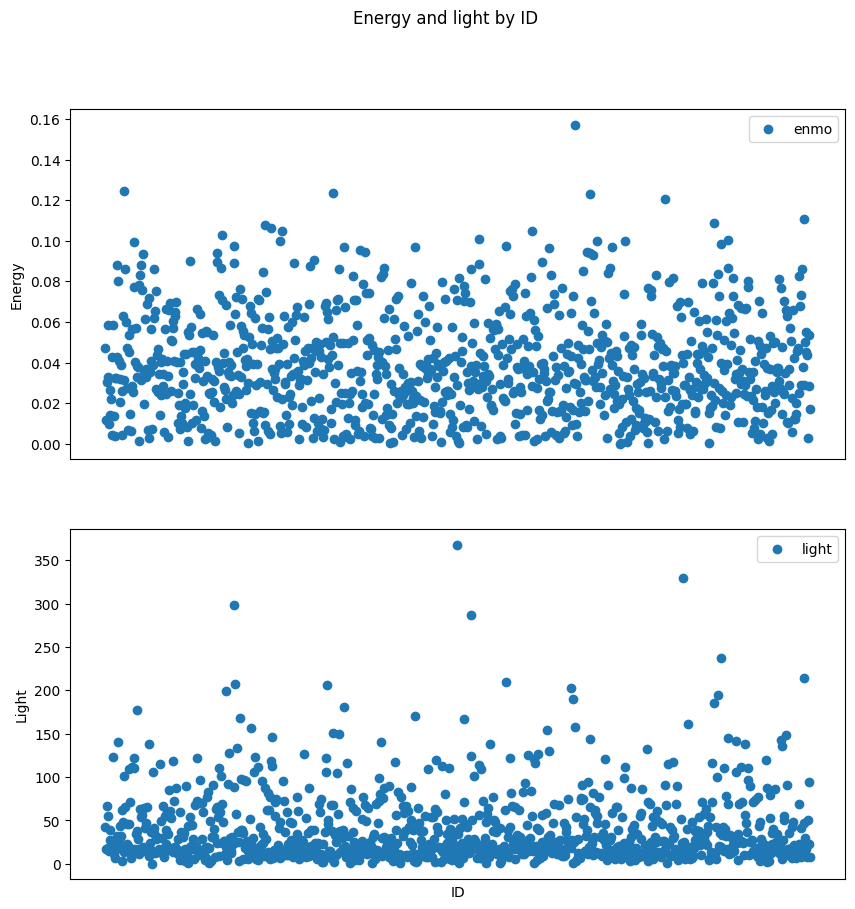

In [14]:
fig, ax = plt.subplots(2, figsize=(10, 10), sharex=True)
ax[0].scatter(df_new['id'], df_new['enmo'], label='enmo')
ax[0].set_ylabel('Energy')
ax[0].legend()

ax[1].scatter(df_new['id'], df_new['light'], label='light')
ax[1].set_ylabel('Light')
ax[1].legend()

plt.xlabel('ID')
plt.xticks([])
fig.suptitle('Energy and light by ID')

In [ ]:
# correlation matrix
df_tabular = df_tabular.merge(df_new, on='id')
df_filtered = df_tabular.dropna(subset=['enmo', 'light', 'sii'])
df_filtered[['enmo', 'light', 'sii']].corr()[['enmo', 'light', 'sii']]

,enmo,light,sii
enmo,1.000000,0.485629,-0.205348
light,0.485629,1.000000,-0.083179
sii,-0.205348,-0.083179,1.000000


### Remarks on the data

Important features to extract from the data:
- activity intensity
- activity duration
- activity frequency
- sleep duration (wristpy package?)
- sleep quality
- light exposure
- duration of non-activity

Questions:
- Should we use features averaged over the whole period? Or separate features for every hour of the day? Or every day of the week?